In [1]:
import os

import pandas as pd
import numpy as np

from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../../hetnet-ml/src')
import graph_tools as gt

DATA_DIR = '../../data/'

base_dir = os.path.join(DATA_DIR, 'time_networks-6_metanode')

In [2]:
meta = pd.DataFrame()

params = 'alpha_0.1/10x_pos-neg/0_year_diff/recall-scoring/2_pmids/dwpc_w_0.6'

for year in tqdm(range(1950, 2025, 5)):
    nodes = pd.read_csv(os.path.join(base_dir, str(year), params, 'nodes_neo4j.csv'))
    edges = pd.read_csv(os.path.join(base_dir, str(year), params, 'edges_neo4j.csv'))
    ind = pd.read_csv(os.path.join(base_dir, str(year), params, 'gold_standard.csv'))

    meta.loc[year, 'n_nodes'] = len(nodes)
    meta.loc[year, 'n_edges'] = len(edges)
    meta.loc[year, 'n_inds'] = len(ind)
    meta.loc[year, 'train_ind'] = len(ind.query('approval_year <= @year'))
    meta.loc[year, 'test_ind'] = meta.loc[year, 'n_inds'] - meta.loc[year, 'train_ind']
    meta.loc[year, 'n_ind_comp'] = ind['start_id'].nunique()
    meta.loc[year, 'n_ind_dis'] = ind['end_id'].nunique()


    n_types = nodes[':LABEL'].value_counts()
    for kind in n_types.index:
        meta.loc[year, kind] = n_types[kind]
    e_types = edges[':TYPE'].value_counts()
    for kind in e_types.index:
        meta.loc[year, kind] = e_types[kind]
        
meta.columns = [c.replace(' ', '_').replace('&', 'n').replace('>', '') for c in meta.columns]

100%|██████████| 15/15 [00:42<00:00,  5.34s/it]


In [3]:
meta.head(2)

,n_nodes,n_edges,n_inds,train_ind,test_ind,n_ind_comp,n_ind_dis,Disorders,Anatomy,Chemicals_n_Drugs,...,ASSOCIATED_WITH_GawDO,ASSOCIATED_WITH_PSawCD,AFFECTS_GafPS,AUGMENTS_GagDO,AFFECTS_GafA,INHIBITS_GinCD,STIMULATES_CDstG,AFFECTS_PHafG,REGULATES_GregG,INTERACTS_WITH_GiwG
1950,6516.0,23727.0,702.0,292.0,410.0,168.0,258.0,2660.0,1946.0,1462.0,...,53.0,24.0,16.0,11.0,8.0,8.0,6.0,3.0,2.0,1.0
1955,9221.0,43413.0,1121.0,664.0,457.0,245.0,346.0,3775.0,2582.0,2217.0,...,163.0,40.0,26.0,20.0,21.0,12.0,16.0,4.0,2.0,2.0


In [4]:
# Get log of some values
types1 = ['n_nodes', 'n_edges', 'n_inds']
types2 = ['log_'+t for t in types1]

meta[types2] = np.log(meta[types1])

In [5]:
def skip_ticks(tick_delta=2):
    locs, labels = plt.xticks()
    plt.xticks(locs[::tick_delta], labels[::tick_delta])

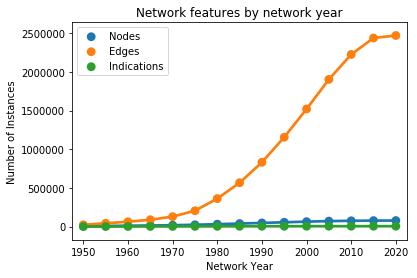

In [6]:
data = meta[types1].reset_index().melt(id_vars=['index'], value_vars=types1)

sns.pointplot(x='index', y='value', data=data, hue='variable')

plt.xlabel('Network Year')
plt.ylabel('Number of Instances')
    
skip_ticks()

new_texts = {'n_nodes': 'Nodes', 'n_edges': 'Edges', 'n_inds': 'Indications'}
L = plt.legend();
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])
    
    
plt.title('Network features by network year');

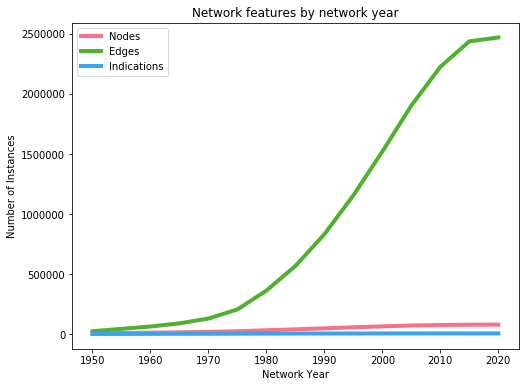

In [7]:
with sns.color_palette('husl', n_colors=len(types1)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    meta[types1].plot(ax=ax, lw=4)
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    new_texts = {'n_nodes': 'Nodes', 'n_edges': 'Edges', 'n_inds': 'Indications'}

    L = plt.legend();
    for t in L.get_texts():
        t.set_text(new_texts[t.get_text()])
    
    plt.title('Network features by network year')

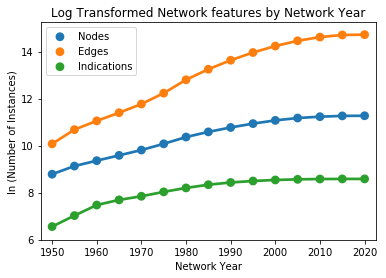

In [8]:
data = meta[types2].reset_index().melt(id_vars=['index'], value_vars=types2)

sns.pointplot(x='index', y='value', data=data, hue='variable')

plt.xlabel('Network Year')
plt.ylabel('ln (Number of Instances)')

skip_ticks()

new_texts = {'log_n_nodes': 'Nodes', 'log_n_edges': 'Edges', 'log_n_inds': 'Indications'}
L = plt.legend();
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])
    
    
plt.title('Log Transformed Network features by Network Year');

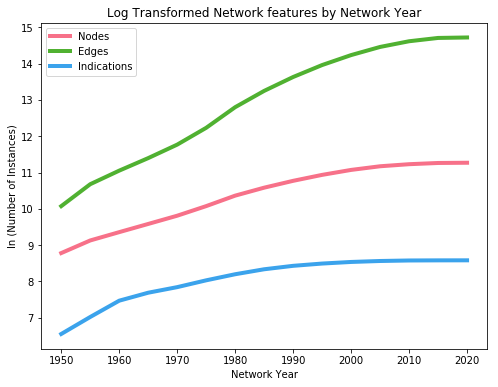

In [9]:
with sns.color_palette('husl', n_colors=len(types2)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    meta[types2].plot(ax=ax, lw=4)
    plt.xlabel('Network Year')
    plt.ylabel('ln (Number of Instances)')
    
    new_texts = {'log_n_nodes': 'Nodes', 'log_n_edges': 'Edges', 'log_n_inds': 'Indications'}

    L = plt.legend()
    for t in L.get_texts():
        t.set_text(new_texts[t.get_text()])
        
    plt.title('Log Transformed Network features by Network Year')

In [10]:
types3 = ['train_ind', 'test_ind']

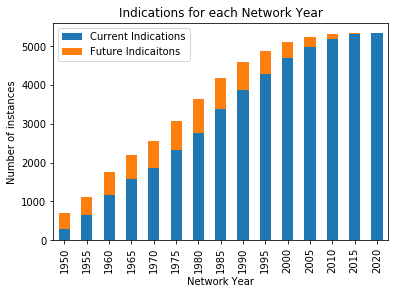

In [11]:
meta[types3].plot(kind='bar', stacked=True)
plt.xlabel('Network Year')
plt.ylabel('Number of instances')

new_texts = {'train_ind': 'Current Indications', 'test_ind': 'Future Indicaitons'}

L = plt.legend()
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])

plt.title('Indications for each Network Year');

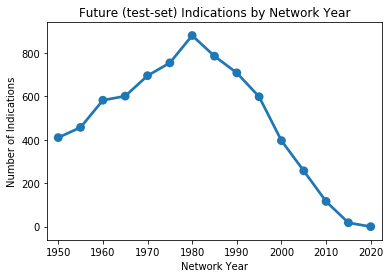

In [12]:
sns.pointplot(x='index', y='test_ind', data=meta['test_ind'].to_frame().reset_index());
skip_ticks()
plt.title('Future (test-set) Indications by Network Year')
plt.xlabel('Network Year')
plt.ylabel('Number of Indications');

In [13]:
types4 = ['n_ind_comp', 'n_ind_dis']

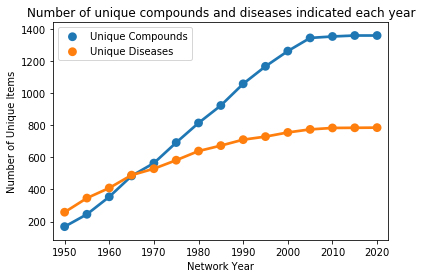

In [14]:
data = meta[types4].stack().to_frame().reset_index().rename(columns={'level_0': 'Network Year', 'level_1': 'Node Type', 0: 'Counts'})
sns.pointplot(x='Network Year', y='Counts', data=data, hue='Node Type')

plt.ylabel('Number of Unique Items')

new_texts = {'n_ind_comp': 'Unique Compounds', 'n_ind_dis': 'Unique Diseases'}

L = plt.legend()
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])

locs, labels = plt.xticks()
tick_delta = 2
plt.xticks(locs[::tick_delta], labels[::tick_delta]);
    
plt.title('Number of unique compounds and diseases indicated each year');

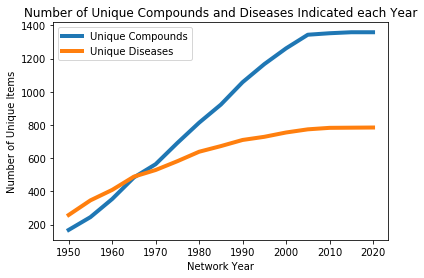

In [15]:
meta[types4].plot(lw=4)
plt.xlabel('Network Year')
plt.ylabel('Number of Unique Items')

new_texts = {'n_ind_comp': 'Unique Compounds', 'n_ind_dis': 'Unique Diseases'}

L = plt.legend()
for t in L.get_texts():
    t.set_text(new_texts[t.get_text()])
    
plt.title('Number of Unique Compounds and Diseases Indicated each Year');

In [16]:
n_names = [n.replace(' ', '_').replace('&', 'n').replace('>', '') for n in n_types.index]

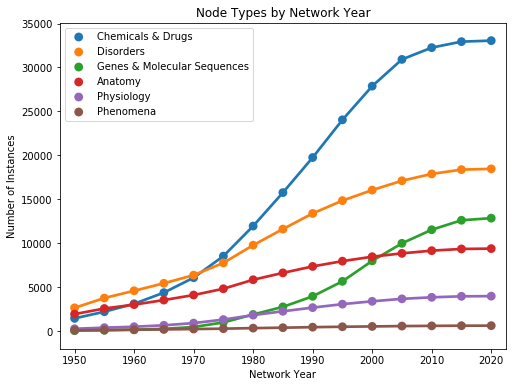

In [17]:
data = meta[n_names].reset_index().melt(id_vars=['index'], value_vars=n_names)

data['variable'] = data['variable'].str.replace('_n_', ' & ').str.replace('_', ' ')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 6))

sns.pointplot(x='index', y='value', data=data, hue='variable')
    
skip_ticks()

plt.legend(title='')

plt.xlabel('Network Year')
plt.ylabel('Number of Instances')
plt.title('Node Types by Network Year');

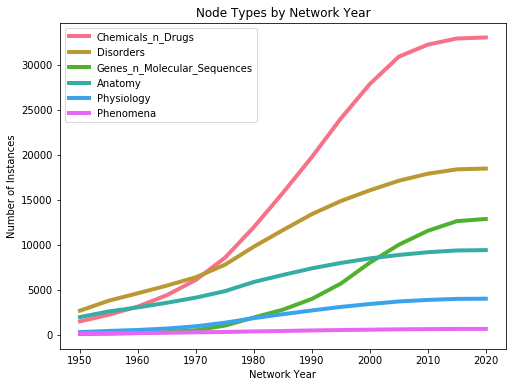

In [18]:
with sns.color_palette('husl', n_colors=len(n_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    meta[n_names].plot(ax=ax, lw=4)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Node Types by Network Year')
    
    plt.legend();

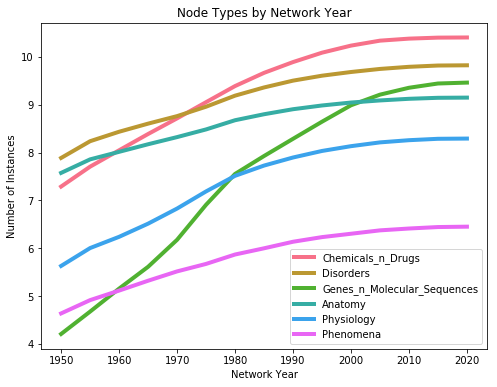

In [19]:
with sns.color_palette('husl', n_colors=len(n_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((8, 6))
    np.log(meta[n_names]).plot(ax=ax, lw=4)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Node Types by Network Year')
    
    plt.legend();

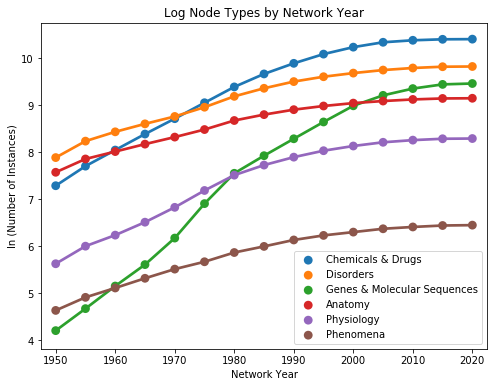

In [20]:
data = meta[n_names].reset_index().melt(id_vars=['index'], value_vars=n_names)
data['value'] = np.log(data['value'])
data['variable'] = data['variable'].str.replace('_n_', ' & ').str.replace('_', ' ')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 6))

sns.pointplot(x='index', y='value', data=data, hue='variable')

skip_ticks()
plt.legend(title='')
plt.xlabel('Network Year')
plt.ylabel('ln (Number of Instances)')
plt.title('Log Node Types by Network Year');

In [21]:
e_names = [e.replace(' ', '_').replace('&', 'n').replace('>', '') for e in e_types.index]

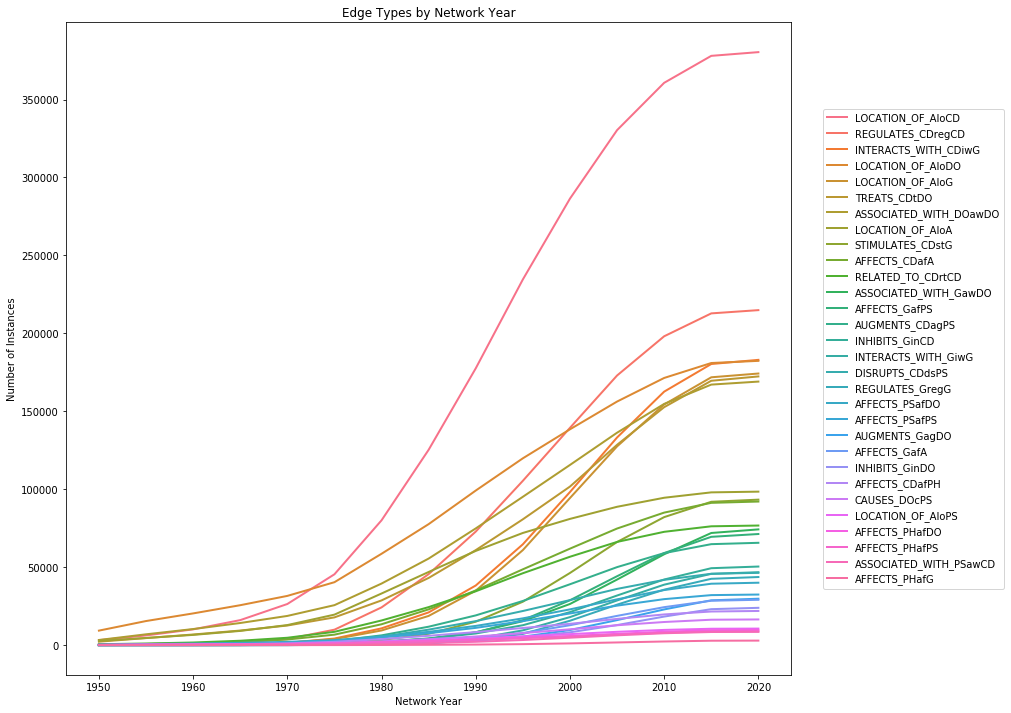

In [22]:
with sns.color_palette('husl', n_colors=len(e_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((13, 12))
    meta[e_names].plot(ax=ax, lw=2)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Edge Types by Network Year')
    
    plt.legend(loc=5, bbox_to_anchor=(1.3, 0.5));

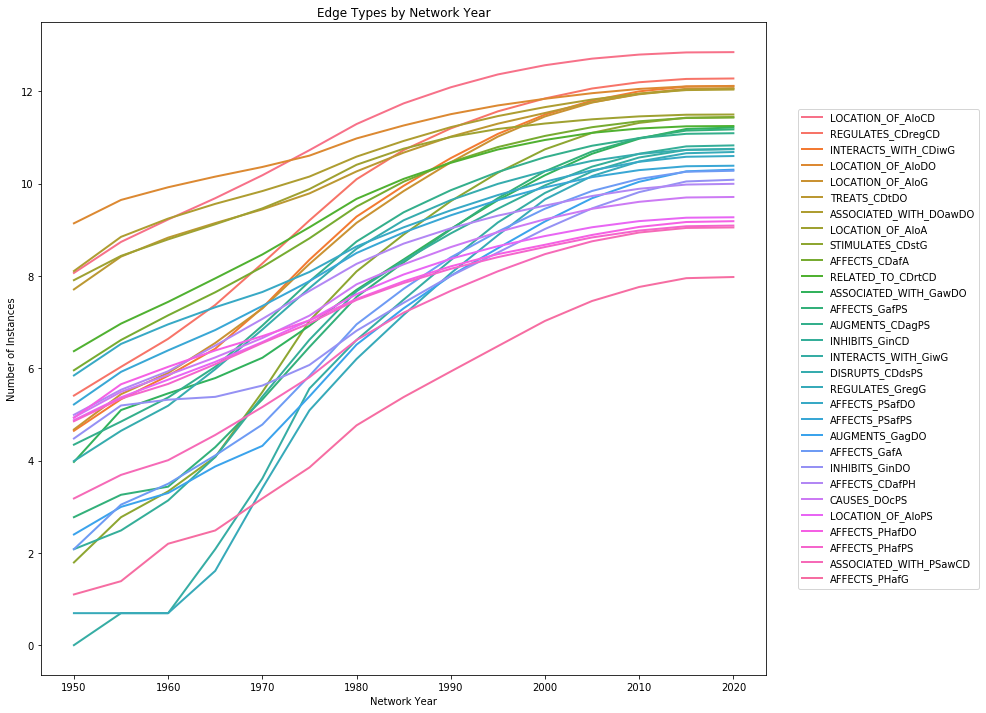

In [23]:
with sns.color_palette('husl', n_colors=len(e_names)):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches((13, 12))
    np.log(meta[e_names]).plot(ax=ax, lw=2)
    
    plt.xlabel('Network Year')
    plt.ylabel('Number of Instances')
    
    plt.title('Edge Types by Network Year')
    
    plt.legend(loc=5, bbox_to_anchor=(1.3, 0.5));

In [24]:
meta.T.loc[e_names, 1950].sort_values(ascending=False).head()

LOCATION_OF_AloDO         9320.0
ASSOCIATED_WITH_DOawDO    3313.0
LOCATION_OF_AloCD         3181.0
LOCATION_OF_AloA          2720.0
TREATS_CDtDO              2226.0
Name: 1950, dtype: float64

In [25]:
meta.T.loc[e_names, 1980].sort_values(ascending=False).head()

LOCATION_OF_AloCD         80086.0
LOCATION_OF_AloDO         58623.0
ASSOCIATED_WITH_DOawDO    39509.0
LOCATION_OF_AloA          33135.0
TREATS_CDtDO              28697.0
Name: 1980, dtype: float64

In [26]:
meta.to_csv('../../data/meta_analysis-6_metanode-2_pmid-w_0.6.csv', index=False)